In [ ]:
# !pip install tqdm
import numpy as np
from tqdm import tqdm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV files with semicolon as the delimiter
df_trades_day_neg2 = pd.read_csv("data/trades_round_1_day_-2.csv", sep=';')
df_trades_day_neg1 = pd.read_csv("data/trades_round_1_day_-1.csv", sep=';')
df_trades_day_0    = pd.read_csv("data/trades_round_1_day_0.csv", sep=';')

# Optional: Add a 'day' column if you want to keep track of the dataset source
df_trades_day_neg2['day'] = 2
df_trades_day_neg1['day'] = 1
df_trades_day_0['day']    = 0

# Concatenate them into a single DataFrame
# df_trades_all = pd.concat([ df_trades_day_0, df_trades_day_neg1, df_trades_day_neg2], ignore_index=True)

# Look at the first few rows
df_trades_all = df_trades_day_0
df_trades_all

,timestamp,buyer,seller,symbol,currency,price,quantity,day
0,100,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10002.0,1,0
1,300,NaN,NaN,KELP,SEASHELLS,2029.0,6,0
2,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,2,0
3,300,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9998.0,1,0
4,300,NaN,NaN,SQUID_INK,SEASHELLS,1965.0,6,0
...,...,...,...,...,...,...,...,...
8177,999500,NaN,NaN,KELP,SEASHELLS,2032.0,2,0
8178,999500,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,9995.0,2,0
8179,999500,NaN,NaN,SQUID_INK,SEASHELLS,1830.0,2,0
8180,999600,NaN,NaN,KELP,SEASHELLS,2032.0,1,0


Correlation of Absolute Prices:
symbol                KELP  RAINFOREST_RESIN  SQUID_INK
symbol                                                 
KELP              1.000000          0.116224  -0.275474
RAINFOREST_RESIN  0.116224          1.000000  -0.001813
SQUID_INK        -0.275474         -0.001813   1.000000


/var/folders/rd/v1tq2dh563z8fv2z2v1xs6yw0000gn/T/ipykernel_48766/536091822.py:17: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



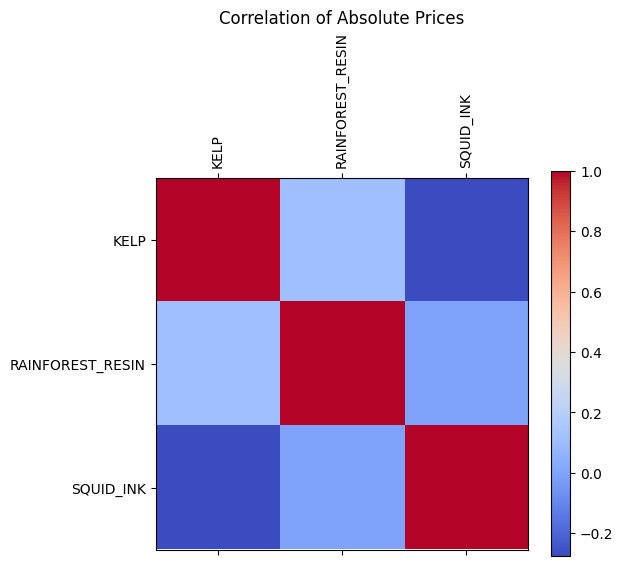

Correlation of Price Changes (Δ Price):
symbol                KELP  RAINFOREST_RESIN  SQUID_INK
symbol                                                 
KELP              1.000000          0.227514   0.527090
RAINFOREST_RESIN  0.227514          1.000000   0.105455
SQUID_INK         0.527090          0.105455   1.000000


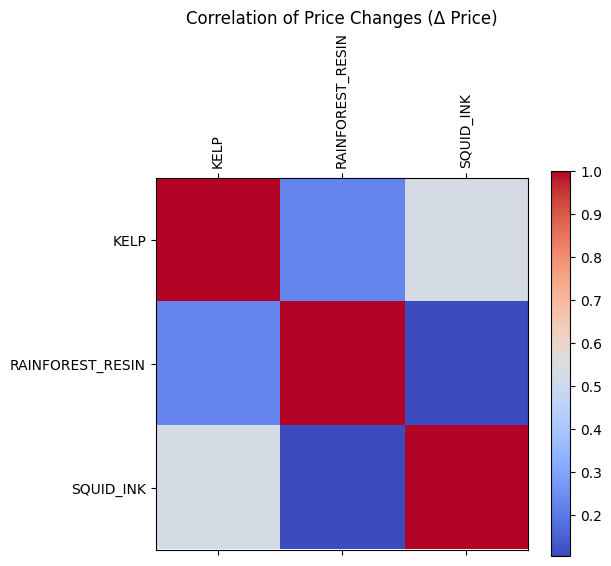

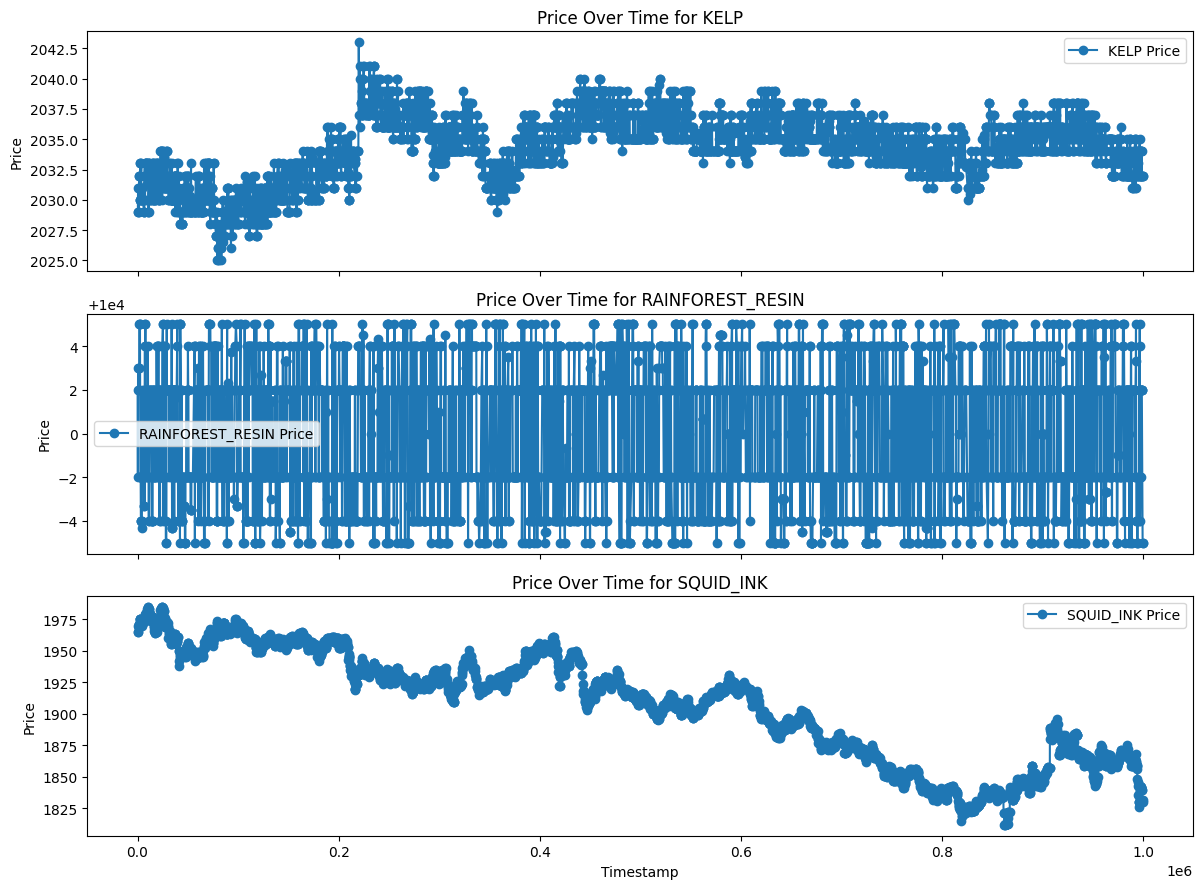

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------
# 1) Create a pivot table: index = timestamp, columns = symbol, values = price
# -------------------------------------------------------------------
# df_trades_all: columns => [timestamp, buyer, seller, symbol, currency, price, quantity, day]
df_pivot = df_trades_all.pivot_table(
    index='timestamp',
    columns='symbol',
    values='price',
    aggfunc='mean'   # you can also use 'last', 'median', etc., if desired
).sort_index()

# If some timestamps do not have trades for every symbol, we can forward/backfill
df_pivot = df_pivot.fillna(method='ffill').fillna(method='bfill')

# -------------------------------------------------------------------
# 2) Price Correlation (Correlation of Raw Prices)
# -------------------------------------------------------------------
price_corr = df_pivot.corr()
print("Correlation of Absolute Prices:")
print(price_corr)

# Quick visualization of the absolute price correlation matrix:
plt.figure(figsize=(6, 5))
plt.title("Correlation of Absolute Prices")
cax = plt.matshow(price_corr, fignum=0, cmap='coolwarm')
plt.colorbar(cax)
# For axis labels
symbols = df_pivot.columns
plt.xticks(range(len(symbols)), symbols, rotation=90)
plt.yticks(range(len(symbols)), symbols)
plt.show()

# -------------------------------------------------------------------
# 3) Price-Change Correlation
# -------------------------------------------------------------------
# Compute the first difference of price for each symbol
df_price_change = df_pivot.diff()

# Drop the first row (NaN after diff) or fill it with 0
df_price_change = df_price_change.iloc[1:]  # drop the first row

price_change_corr = df_price_change.corr()
print("Correlation of Price Changes (Δ Price):")
print(price_change_corr)

# Visualize the price-change correlation matrix:
plt.figure(figsize=(6, 5))
plt.title("Correlation of Price Changes (Δ Price)")
cax2 = plt.matshow(price_change_corr, fignum=0, cmap='coolwarm')
plt.colorbar(cax2)
plt.xticks(range(len(symbols)), symbols, rotation=90)
plt.yticks(range(len(symbols)), symbols)
plt.show()

# -------------------------------------------------------------------
# 4) Price Over Time Plot
# -------------------------------------------------------------------
# We'll create a stacked time series plot for each symbol using subplots.
# The x-axis is timestamp, and the y-axis is the price.
num_symbols = len(df_pivot.columns)
fig, axes = plt.subplots(nrows=num_symbols, ncols=1, figsize=(12, 3*num_symbols), sharex=True)

# If there's only one symbol, axes might not be an array. In that case, convert it to a list.
if num_symbols == 1:
    axes = [axes]

for i, symbol in enumerate(df_pivot.columns):
    axes[i].plot(df_pivot.index, df_pivot[symbol], marker='o', linestyle='-', label=f'{symbol} Price')
    axes[i].set_title(f"Price Over Time for {symbol}")
    axes[i].set_ylabel("Price")
    axes[i].legend(loc='best')
    
# Label the shared x-axis
axes[-1].set_xlabel("Timestamp")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV files with semicolon as the delimiter
df_prices_day_2 = pd.read_csv("data/prices_round_1_day_-2.csv", sep=';')
df_prices_day_1 = pd.read_csv("data/prices_round_1_day_-1.csv", sep=';')
df_prices_day_0    = pd.read_csv("data/prices_round_1_day_0.csv", sep=';')

# Optional: Add a 'day' column if you want to keep track of the dataset source
df_prices_day_2['day'] = 2
df_prices_day_1['day'] = 1
df_prices_day_0['day']    = 0

# Concatenate them into a single DataFrame
# df_trades_all = pd.concat([ df_trades_day_0, df_trades_day_neg1, df_trades_day_neg2], ignore_index=True)

# Look at the first few rows
df_trades_all = df_trades_day_0
df_trades_all

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,KELP,2028,30,NaN,NaN,NaN,NaN,2032,30,NaN,NaN,NaN,NaN,2030.0,0.0
2,0,0,SQUID_INK,1968,30,NaN,NaN,NaN,NaN,1971,30,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1969,4,1967.0,31.0,NaN,NaN,1971,31,NaN,NaN,NaN,NaN,1970.0,0.0
4,0,100,KELP,2030,4,2028.0,31.0,NaN,NaN,2032,31,NaN,NaN,NaN,NaN,2031.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,999800,KELP,2032,27,NaN,NaN,NaN,NaN,2034,1,2035.0,27.0,NaN,NaN,2033.0,0.0
29996,0,999800,RAINFOREST_RESIN,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
29997,0,999900,RAINFOREST_RESIN,9996,2,9995.0,21.0,NaN,NaN,10004,2,10005.0,21.0,NaN,NaN,10000.0,0.0
29998,0,999900,SQUID_INK,1838,23,NaN,NaN,NaN,NaN,1841,23,NaN,NaN,NaN,NaN,1839.5,0.0


/var/folders/rd/v1tq2dh563z8fv2z2v1xs6yw0000gn/T/ipykernel_48766/3204320332.py:42: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Correlation of Absolute Prices:
product               KELP  RAINFOREST_RESIN  SQUID_INK
product                                                
KELP              1.000000           0.00545  -0.254446
RAINFOREST_RESIN  0.005450           1.00000   0.023510
SQUID_INK        -0.254446           0.02351   1.000000


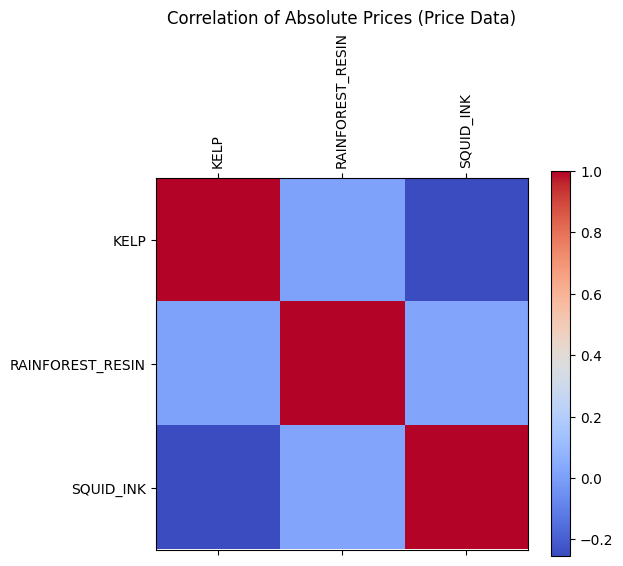

Correlation of Price Changes (Δ Price):
product               KELP  RAINFOREST_RESIN  SQUID_INK
product                                                
KELP              1.000000          0.180556   0.317384
RAINFOREST_RESIN  0.180556          1.000000   0.074726
SQUID_INK         0.317384          0.074726   1.000000


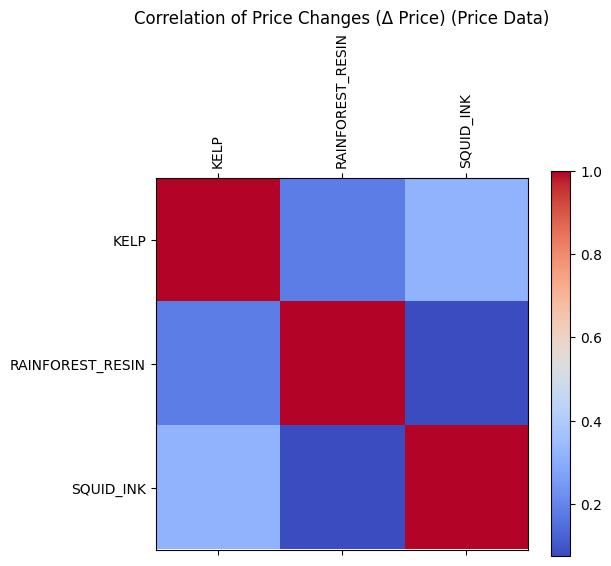

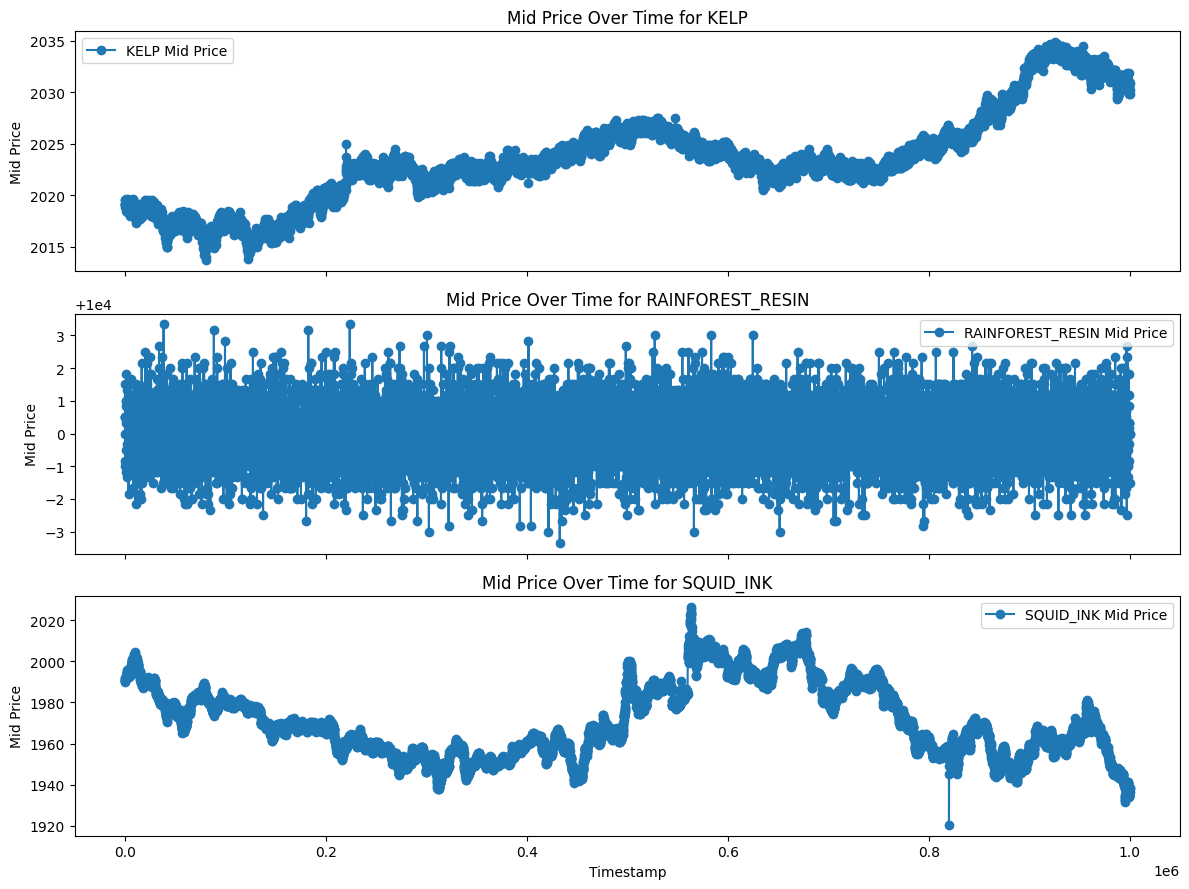

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1) Read the Price Data
# -------------------------------
# (Assuming you have one or multiple CSVs that you combine)
# For example, you might have multiple files like:
# "prices_round_1_day_-1.csv", "prices_round_1_day_-2.csv", "prices_round_1_day_0.csv"
# Here, we assume you have already read/concatenated them into a DataFrame called df_prices_all.
# Make sure to use the semicolon separator since your data uses ";".
#
# Example:
df_prices_day_neg1 = pd.read_csv("data/prices_round_1_day_-1.csv", sep=';')
df_prices_day_neg2 = pd.read_csv("data/prices_round_1_day_-2.csv", sep=';')
df_prices_day_0    = pd.read_csv("data/prices_round_1_day_0.csv", sep=';')

df_prices_day_neg1['day'] = -1
df_prices_day_neg2['day'] = -2
df_prices_day_0['day']    = 0

df_prices_all = pd.concat([df_prices_day_neg2, df_prices_day_neg1, df_prices_day_0],
                          ignore_index=True)

# For this example we assume df_prices_all is already available and has the following columns:
# [i, day, timestamp, product, bid_price_1, bid_volume_1, ..., mid_price, profit_and_loss]

# -------------------------------
# 2) Create a Pivot Table from Price Data
# -------------------------------
# We'll use the "timestamp" as the index and "product" as the columns.
# The cell values will be the mid_price.
df_pivot = df_prices_all.pivot_table(
    index='timestamp',
    columns='product',
    values='mid_price',
    aggfunc='mean'  # If more than one trade/price exists per timestamp, adjust the aggregation as needed.
).sort_index()

# Fill missing values by propagating the last known price (forward then backward)
df_pivot = df_pivot.fillna(method='ffill').fillna(method='bfill')

# -------------------------------
# 3) Correlation of Absolute Prices
# -------------------------------
price_corr = df_pivot.corr()
print("Correlation of Absolute Prices:")
print(price_corr)

plt.figure(figsize=(6, 5))
plt.title("Correlation of Absolute Prices (Price Data)")
cax = plt.matshow(price_corr, fignum=0, cmap='coolwarm')
plt.colorbar(cax)
symbols = df_pivot.columns  # Now these are product names
plt.xticks(range(len(symbols)), symbols, rotation=90)
plt.yticks(range(len(symbols)), symbols)
plt.show()

# -------------------------------
# 4) Correlation of Price Changes
# -------------------------------
# Calculate the first difference (price change) for each product over time.
df_price_change = df_pivot.diff()

# Drop the first row where diff() results in NaN.
df_price_change = df_price_change.iloc[1:]

price_change_corr = df_price_change.corr()
print("Correlation of Price Changes (Δ Price):")
print(price_change_corr)

plt.figure(figsize=(6, 5))
plt.title("Correlation of Price Changes (Δ Price) (Price Data)")
cax2 = plt.matshow(price_change_corr, fignum=0, cmap='coolwarm')
plt.colorbar(cax2)
plt.xticks(range(len(symbols)), symbols, rotation=90)
plt.yticks(range(len(symbols)), symbols)
plt.show()

# -------------------------------
# 5) Time Series Plot: Price Over Time for Each Product
# -------------------------------
# We'll create a stacked subplot with one panel per product.
num_products = len(df_pivot.columns)
fig, axes = plt.subplots(nrows=num_products, ncols=1, figsize=(12, 3*num_products), sharex=True)

# In case there's only one product, ensure axes is iterable.
if num_products == 1:
    axes = [axes]

for i, product in enumerate(df_pivot.columns):
    axes[i].plot(df_pivot.index, df_pivot[product], marker='o', linestyle='-', label=f'{product} Mid Price')
    axes[i].set_title(f"Mid Price Over Time for {product}")
    axes[i].set_ylabel("Mid Price")
    axes[i].legend(loc='best')

# Label the shared x-axis
axes[-1].set_xlabel("Timestamp")
plt.tight_layout()
plt.show()
